## Lending Club Data

In [1]:
#IMPORTS

from google.colab import drive
from google.colab import files

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [2]:
drive.mount('drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [3]:
df= pd.read_csv('drive/Team Drives/Marketing Analytics/lc_2016_2017.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


###1. Data Preprocessing

In [4]:
# Random select 10% of original dataset
df_sample = df.sample(frac=0.1)
df_sample.shape

(75934, 72)

In [0]:
# Keep columns that has more than 90% not null data 
df_sample1=df_sample.dropna(thresh=df_sample.shape[0]*0.9,how='all',axis=1)


In [6]:
df_sample1.shape

(75934, 62)

In [8]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter

trace0 = go.Bar(
    x = df_sample1.emp_title.value_counts()[:30].index.values,
    y = df_sample1.emp_title.value_counts()[:30].values,
    marker=dict(
        color=df_sample1.emp_title.value_counts()[:30].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

employment titles span from teacher, manager to truck driver and have more 20K different entries, this is mainly because those data were entered by applicants/borrowers themselves. To simplify our work, we decided to drop this column.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

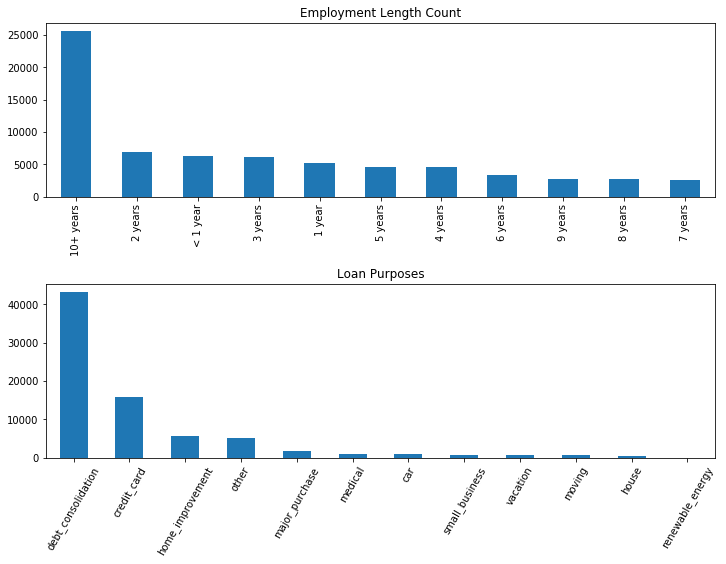

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plt.subplots_adjust(wspace=1.0, hspace=0.50)
df_sample1.emp_length.value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Employment Length Count")
df_sample1.purpose.value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title("Loan Purposes")
plt.xticks(rotation=60)

**Drop missing value columns**

In [0]:
df_sample1.emp_title.value_counts()
df_sample1.title.value_counts()
df_sample2 = df_sample1.dropna(subset=['revol_util','dti', 'title','mths_since_rcnt_il','all_util','inq_fi','total_cu_tl','inq_last_12m'])
df_sample2.isnull().sum()
df_sample3=df_sample2.drop(['last_pymnt_d','emp_title'],axis=1)


fill in missing values in 'employment length' column with 'less than 1 year' 

In [0]:
df_sample3["emp_length"]=df_sample3["emp_length"].fillna("< 1 year")


0


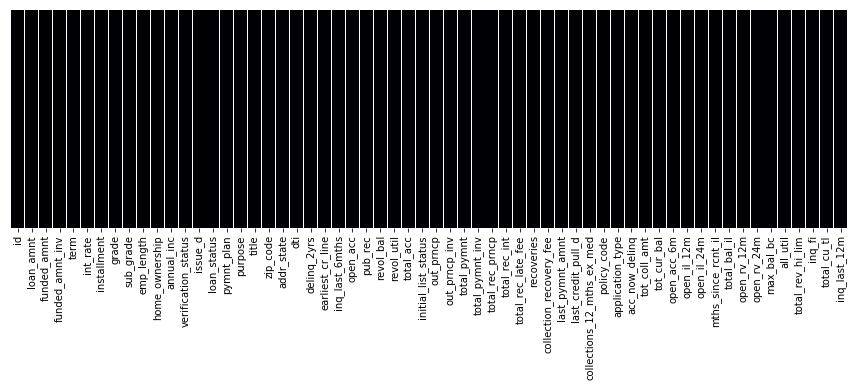

In [13]:
tot_cel = df_sample3.isnull().sum().sum()
print(tot_cel)
plt.figure(figsize=(15,4))
sns.heatmap(df_sample3.isnull(), cbar = False, yticklabels=False, cmap="magma" )

In [0]:
df_sample3.isnull().sum()


id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [0]:
df_sample3.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
151961,98114264,24000,24000,24000.0,36 months,7.99,751.97,A,A5,3 years,RENT,350000.00,Verified,Feb-2017,Current,n,debt_consolidation,Debt consolidation,102xx,NY,6.35,0,Jan-2012,0.0,5,0,23882.0,59.0,5,w,17897.68,17897.68,7509.05,7509.05,6102.32,1406.73,0.0,0.0,0.0,751.97,Dec-2017,0,1,Individual,0,0.0,50224.0,1.0,1.0,1.0,9.0,10141.0,1.0,1.0,14036.0,59.0,40500.0,1.0,1.0,1.0
586993,92330683,7500,7500,7475.0,36 months,8.24,235.86,B,B1,10+ years,RENT,57000.00,Not Verified,Nov-2016,Current,n,debt_consolidation,Debt consolidation,170xx,PA,29.12,1,Mar-1999,2.0,6,1,7213.0,54.0,28,f,5002.04,4985.37,3086.79,3076.50,2497.96,588.83,0.0,0.0,0.0,235.86,Dec-2017,0,1,Individual,0,0.0,70593.0,3.0,2.0,2.0,2.0,63380.0,1.0,1.0,3888.0,54.0,13250.0,0.0,0.0,4.0
626032,75922743,14000,14000,14000.0,36 months,5.32,421.61,A,A1,3 years,RENT,52000.00,Source Verified,Mar-2016,Current,n,credit_card,Credit card refinancing,900xx,CA,5.59,0,Dec-1994,0.0,12,0,11470.0,26.9,33,w,6498.07,6498.07,8423.92,8423.92,7501.93,921.99,0.0,0.0,0.0,421.61,Dec-2017,0,1,Individual,0,0.0,11470.0,1.0,0.0,0.0,34.0,0.0,4.0,5.0,6589.0,27.0,42700.0,1.0,0.0,1.0
210042,90188130,26875,26875,26875.0,36 months,13.49,911.89,C,C2,1 year,RENT,56000.00,Verified,Sep-2016,Current,n,debt_consolidation,Debt consolidation,107xx,NY,28.94,0,Oct-2002,0.0,11,0,31612.0,67.5,27,w,17685.49,17685.49,12766.46,12766.46,9189.51,3576.95,0.0,0.0,0.0,911.89,Dec-2017,0,1,Individual,0,0.0,67050.0,0.0,0.0,0.0,42.0,33126.0,0.0,0.0,9529.0,64.0,46800.0,0.0,1.0,0.0
362617,115711414,10000,10000,10000.0,36 months,5.32,301.15,A,A1,< 1 year,MORTGAGE,63992.52,Not Verified,Aug-2017,Current,n,credit_card,Credit card refinancing,374xx,TN,3.68,0,Jun-1986,0.0,10,0,11264.0,16.5,16,w,8965.88,8965.88,1201.64,1201.64,1034.12,167.52,0.0,0.0,0.0,301.15,Dec-2017,0,1,Individual,0,0.0,132315.0,0.0,0.0,0.0,39.0,0.0,0.0,1.0,5202.0,17.0,68200.0,0.0,0.0,0.0


In [14]:
df_sample3.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                        int64
pub_rec                         int64
revol_bal   

Now that we explored the whole dataframe easily, we will now select the columns that are necessary for our analysis.



In [20]:
df_LC = df_sample3.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])
df_LC.dtypes

loan_amnt                int64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs              int64
loan_status             object
dtype: object

Finding the correlation between variables¶
We will now look at the correlation structure between our variables that we selected above. This will tell us about any dependencies between different variables and help us reduce the dimensionality a little bit more

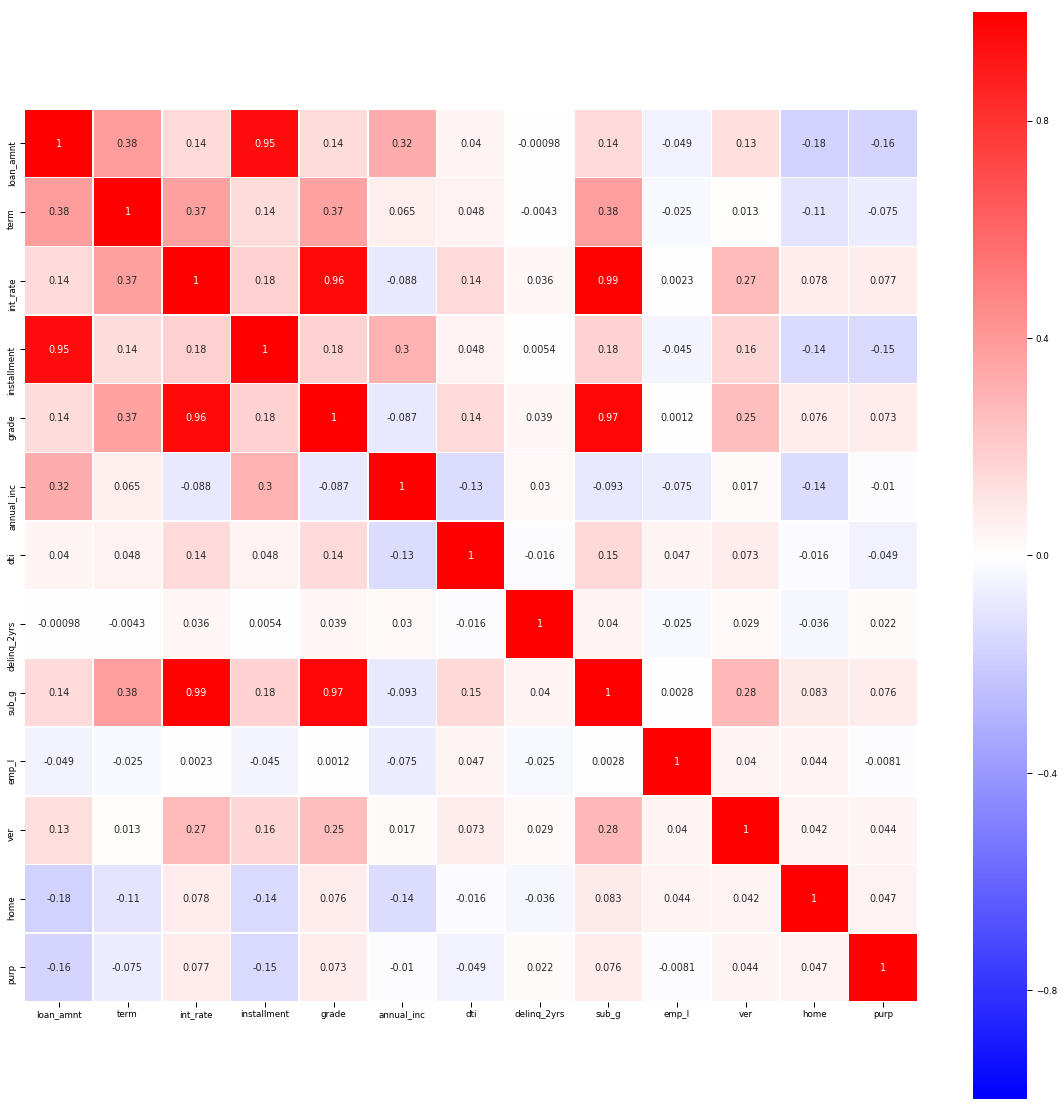

In [21]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(grade=df_LC.grade.astype('category').cat.codes,
                         sub_g=df_LC.sub_grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                        emp_l=df_LC.emp_length.astype('category').cat.codes,
                         ver =df_LC.verification_status.astype('category').cat.codes,
                        home=df_LC.home_ownership.astype('category').cat.codes,
                        purp=df_LC.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

It can be seen from the plot above that loan amount and installment have a very high correlation amongst each other (0.94). This is intuitive since a person who takes a large sum of loan would require extra time to repay it back. Also, interest rate, sub grade and grade have a very high correlation between them. This is obvious since interest rate is decided by grades once the grades are decided, a subgrade is assigned to that loan (leading to high correlation).

Let's drop the three categories alongwith term and verification status(since it doesn't provide any valuable info) for further analysis.

In [0]:
df_LC.drop(['installment','grade','sub_grade','verification_status','term']
           , axis=1, inplace = True)

In [23]:
df_LC.shape

(71580, 9)

In [0]:
df_LC.dtypes

loan_amnt           int64
int_rate          float64
emp_length         object
home_ownership     object
annual_inc        float64
purpose            object
dti               float64
delinq_2yrs         int64
loan_status        object
dtype: object

In [0]:
X = df_LC.values

## Clustering

In [0]:
df_LC2 = df_LC.filter(['loan_amnt','int_rate',
                    'annual_inc','dti'])

In [0]:
df_LC2.dtypes

loan_amnt       int64
int_rate      float64
annual_inc    float64
dti           float64
dtype: object

In [0]:
n_unique = df_LC2.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
loan_amnt     1415
int_rate       155
annual_inc    6492
dti           4635
dtype: int64


In [0]:
# cluster_log = np.log(df_LC2)
# distributions(cluster_log)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_LC2)

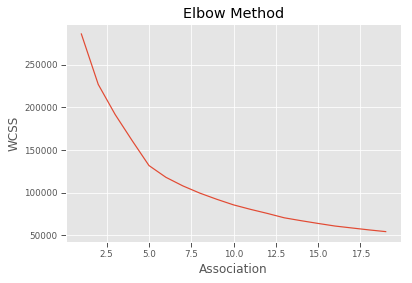

In [0]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(cluster_scaled)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(cluster_scaled)


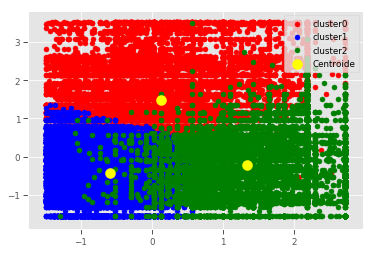

In [0]:
#Visualising the clusters

plt.scatter(cluster_scaled[y_kmeans == 0, 0], cluster_scaled[y_kmeans == 0, 1], s = 25, 
            c = 'red', label = 'cluster0')
plt.scatter(cluster_scaled[y_kmeans == 1, 0], cluster_scaled[y_kmeans == 1, 1], s = 25, 
            c = 'blue', label = 'cluster1')
plt.scatter(cluster_scaled[y_kmeans == 2, 0], cluster_scaled[y_kmeans == 2, 1], s = 25, 
            c = 'green', label = 'cluster2')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroide')

plt.legend()

In [0]:
cluster_scaled[y_kmeans == 0, 0]

array([ 0.54435292, -0.56133635,  0.02117312, ..., -1.08181935,
        1.50980843,  0.56053374])

In [0]:
cluster_scaled[y_kmeans == 0, 1]

array([1.83864547, 2.14341194, 1.83864547, ..., 2.83606302, 1.89603656,
       0.75810979])

In [0]:
cluster_scaled[y_kmeans == 0, 2]

array([-0.27869237, -0.6092862 , -0.40907797, ..., -0.48415606,
        0.31667684, -0.13379167])

In [0]:
labels = kmeans.labels_


In [0]:
df_LC2['clusters'] = labels


In [0]:
df_LC2.head(10)

,loan_amnt,int_rate,annual_inc,dti,clusters
151961,24000,7.99,350000.00,6.35,2
586993,7500,8.24,57000.00,29.12,1
626032,14000,5.32,52000.00,5.59,1
210042,26875,13.49,56000.00,28.94,2
362617,10000,5.32,63992.52,3.68,1
164706,16000,12.74,72000.00,23.98,1
295422,5000,12.79,85000.00,22.49,1
445254,28075,7.39,56160.00,17.48,2
672736,6000,9.16,53000.00,8.22,1
389084,12000,13.59,70000.00,12.22,1


In [0]:
df_LC2.groupby(['clusters']).loan_amnt.mean()


clusters
0    15981.353832
1     9370.938852
2    27160.159230
Name: loan_amnt, dtype: float64

In [0]:
df_LC2.groupby(['clusters']).int_rate.mean()


clusters
0    20.591901
1    11.003075
2    12.021914
Name: int_rate, dtype: float64

In [0]:
df_LC2.groupby(['clusters']).annual_inc.mean()


clusters
0     63953.064280
1     66302.600271
2    130644.295406
Name: annual_inc, dtype: float64

* ###    **Cluster 0: Low income, high interest rate, relative high loan**

* ###   **Cluster 1: Low income, low interest rate, low loan amount**

* ###   **Cluster 2: High income, low interest rate, high loan amount**





### 2. Feature Selection

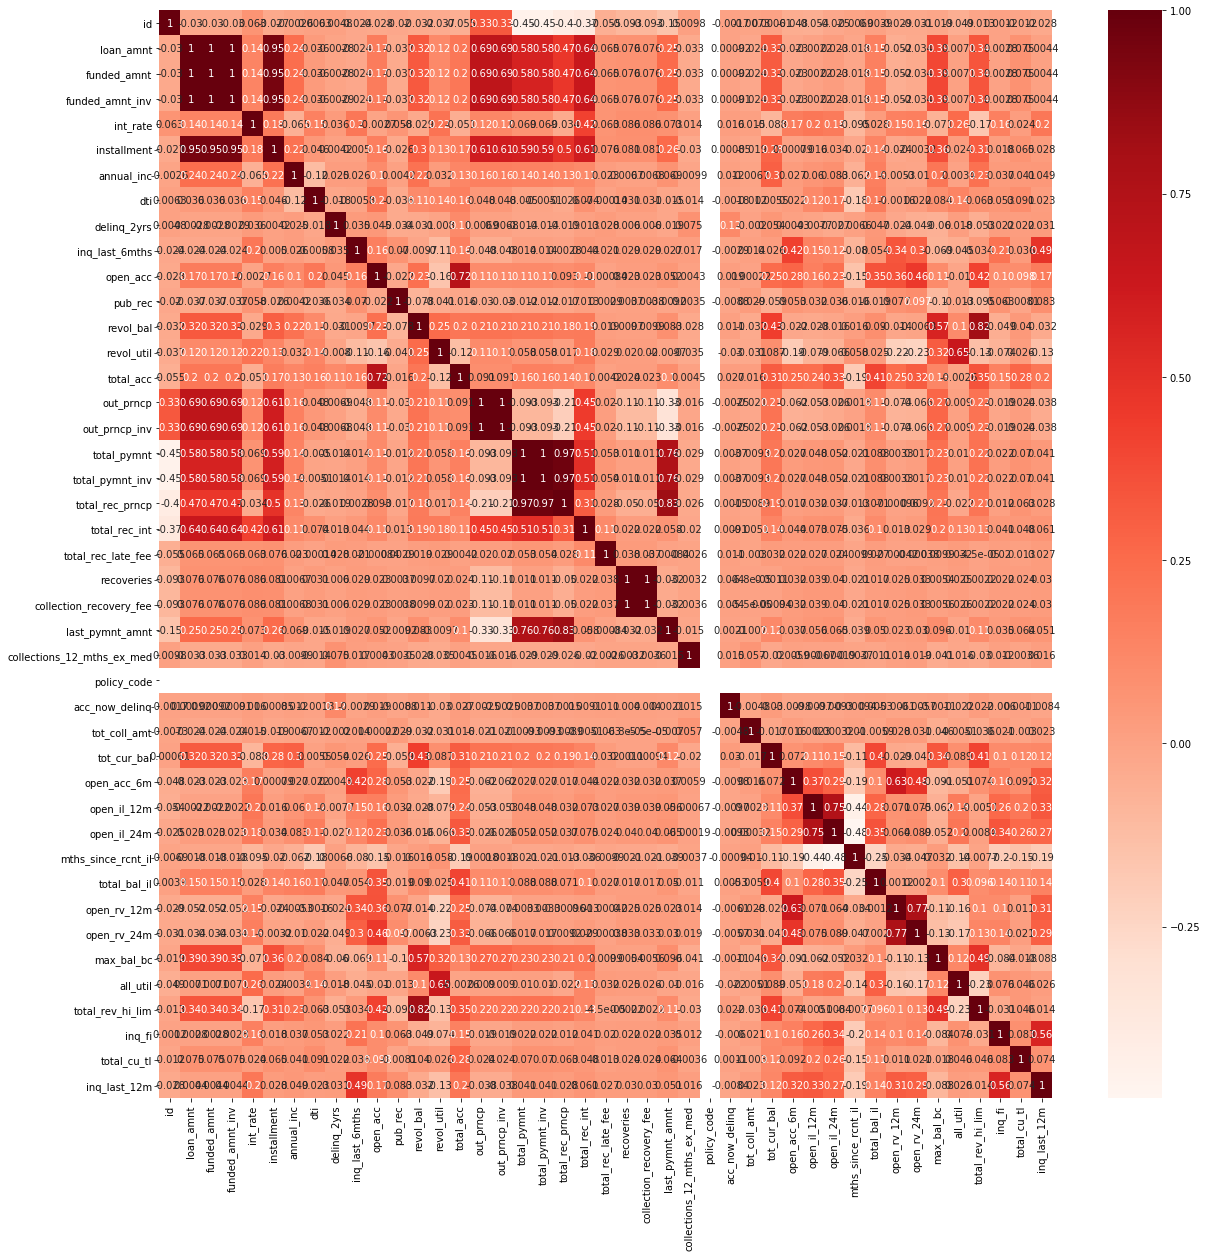

In [0]:
plt.figure(figsize=(20,20))
cor = df_sample3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [0]:
df_sample4 = df_sample3.copy()
df_sample4 = df_sample4.drop(columns = ['id','issue_d','zip_code'])
df_sample4 = pd.get_dummies(df_sample4)
df_sample4.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,...,earliest_cr_line_Sep-2002,earliest_cr_line_Sep-2003,earliest_cr_line_Sep-2004,earliest_cr_line_Sep-2005,earliest_cr_line_Sep-2006,earliest_cr_line_Sep-2007,earliest_cr_line_Sep-2008,earliest_cr_line_Sep-2009,earliest_cr_line_Sep-2010,earliest_cr_line_Sep-2011,earliest_cr_line_Sep-2012,earliest_cr_line_Sep-2013,initial_list_status_f,initial_list_status_w,last_credit_pull_d_Apr-2016,last_credit_pull_d_Apr-2017,last_credit_pull_d_Aug-2016,last_credit_pull_d_Aug-2017,last_credit_pull_d_Dec-2016,last_credit_pull_d_Dec-2017,last_credit_pull_d_Feb-2016,last_credit_pull_d_Feb-2017,last_credit_pull_d_Jan-2016,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jul-2016,last_credit_pull_d_Jul-2017,last_credit_pull_d_Jun-2016,last_credit_pull_d_Jun-2017,last_credit_pull_d_Mar-2016,last_credit_pull_d_Mar-2017,last_credit_pull_d_May-2016,last_credit_pull_d_May-2017,last_credit_pull_d_Nov-2016,last_credit_pull_d_Nov-2017,last_credit_pull_d_Oct-2016,last_credit_pull_d_Oct-2017,last_credit_pull_d_Sep-2016,last_credit_pull_d_Sep-2017,application_type_Individual,application_type_Joint App
335535,6000,6000,6000.0,10.42,194.79,47223.0,14.08,0,0.0,18,0,1508.0,25.1,34,5568.20,5568.20,580.90,580.90,431.80,149.10,0.0,0.0,0.0,194.79,0,1,0,2099.0,53010.0,0.0,0.0,0.0,28.0,51502.0,0.0,4.0,450.0,93.0,6000.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
585978,20000,20000,20000.0,10.49,649.96,87144.0,23.95,0,0.0,7,0,19957.0,95.0,16,13488.77,13488.77,8455.17,8455.17,6511.23,1943.94,0.0,0.0,0.0,649.96,0,1,0,0.0,49190.0,0.0,1.0,2.0,8.0,29233.0,0.0,0.0,12094.0,77.0,21000.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
140964,13500,13500,13500.0,15.99,474.56,36480.0,23.36,0,0.0,8,0,16877.0,45.1,21,10702.11,10702.11,4259.05,4259.05,2797.89,1461.16,0.0,0.0,0.0,474.56,0,1,0,0.0,18041.0,1.0,0.0,1.0,18.0,1164.0,1.0,3.0,6855.0,39.0,37400.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
278493,25000,25000,25000.0,13.49,848.27,96000.0,23.89,0,1.0,6,0,25606.0,86.2,14,14439.19,14439.19,14445.46,14445.46,10560.81,3884.65,0.0,0.0,0.0,848.27,0,1,0,0.0,407244.0,0.0,0.0,2.0,16.0,36157.0,0.0,0.0,15975.0,74.0,29700.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
41086,10000,10000,10000.0,11.99,332.10,40000.0,15.15,2,0.0,8,0,6598.0,19.7,15,8571.63,8571.63,1985.94,1985.94,1428.37,557.57,0.0,0.0,0.0,332.10,0,1,0,0.0,182455.0,0.0,0.0,0.0,58.0,3673.0,0.0,1.0,3850.0,22.0,33500.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:

y = df_sample4[['int_rate']]
x = df_sample4.loc[:, df_sample4.columns !='int_rate']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)



In [0]:
clf_rf = RandomForestRegressor(random_state=1234)      
clr_rf = clf_rf.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



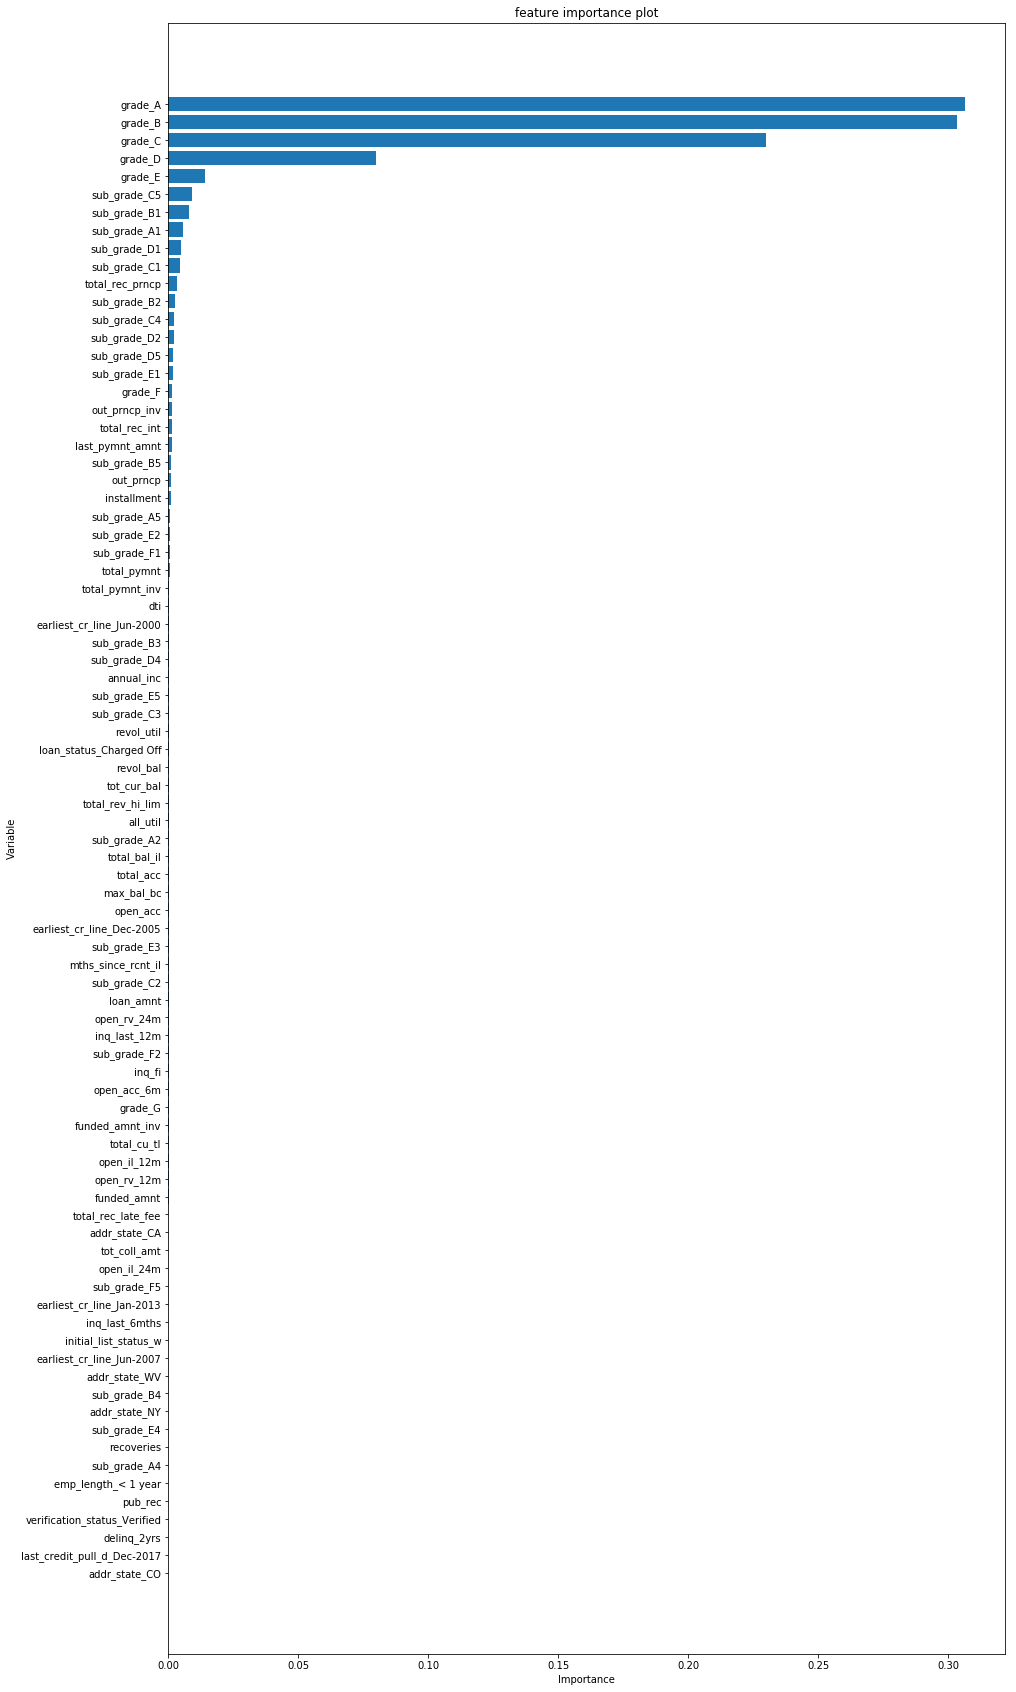

In [0]:
rf_importance=clr_rf.feature_importances_
rf_importance

sorted_indices=np.argsort(rf_importance)[750:len(rf_importance)]

y_pos= range(83)
plt.figure(figsize=(15,30))
plt.barh(y_pos, rf_importance[sorted_indices], align="center")
plt.yticks(y_pos, x_train.columns[sorted_indices])
plt.title("feature importance plot")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()
# feat_importances = pd.Series(clr_rf.feature_importances_, index=x_train.columns)
# feat_importances.nlargest(40).plot(kind='bar')

In [0]:
feat_importances.nlargest(80)

grade_A                         0.306580
grade_B                         0.303378
grade_C                         0.229961
grade_D                         0.079778
grade_E                         0.014134
sub_grade_C5                    0.009092
sub_grade_B1                    0.008142
sub_grade_A1                    0.005758
sub_grade_D1                    0.004866
sub_grade_C1                    0.004306
total_rec_prncp                 0.003456
sub_grade_B2                    0.002643
sub_grade_C4                    0.002340
sub_grade_D2                    0.002146
sub_grade_D5                    0.001844
sub_grade_E1                    0.001836
grade_F                         0.001519
out_prncp_inv                   0.001414
total_rec_int                   0.001277
last_pymnt_amnt                 0.001237
sub_grade_B5                    0.001200
out_prncp                       0.001130
installment                     0.000914
sub_grade_A5                    0.000729
sub_grade_E2    